In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.cm     as cm
import seaborn           as sns
import statsmodels.api   as     sm
import scipy.stats       as     stats
from sklearn             import datasets
from sklearn.metrics     import mean_squared_error
from sklearn.preprocessing    import PolynomialFeatures
from sklearn.linear_model     import LinearRegression
from sklearn                  import linear_model
from sklearn.model_selection  import train_test_split
from sklearn.metrics     import confusion_matrix 
from sklearn.metrics     import accuracy_score 
from sklearn.metrics     import classification_report
from sklearn.metrics     import precision_score
from sklearn.metrics     import recall_score
#from imblearn.metrics    import specificity_score
from sklearn.metrics     import f1_score 
from sklearn             import metrics
from sklearn.metrics     import confusion_matrix,auc,roc_auc_score
from sklearn.model_selection   import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.cm     as cm
from sklearn.preprocessing     import StandardScaler
from sklearn.cluster     import KMeans
from scipy.cluster.hierarchy   import dendrogram, linkage
from scipy.cluster.hierarchy   import fcluster
from scipy.cluster.hierarchy   import cophenet
from scipy.spatial.distance    import pdist
from pylab                import rcParams
import scipy.cluster.hierarchy  as sch
from sklearn.cluster      import AgglomerativeClustering
from sklearn.svm          import SVC
from sklearn.decomposition     import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics       import accuracy_score
from sklearn.model_selection   import train_test_split
from sklearn.metrics       import confusion_matrix
from sklearn.metrics       import recall_score, precision_score, f1_score
from sklearn.metrics       import classification_report, confusion_matrix
from sklearn.pipeline      import Pipeline
from sklearn.pipeline      import make_pipeline
from sklearn.svm           import SVC
from sklearn.neighbors     import KNeighborsClassifier
from sklearn.tree          import DecisionTreeClassifier
from sklearn.model_selection   import cross_validate
from sklearn.svm           import LinearSVC
from sklearn.naive_bayes   import MultinomialNB, BernoulliNB
from sklearn.model_selection   import cross_val_score
from sklearn.metrics       import accuracy_score, log_loss
from sklearn.svm           import SVC, LinearSVC, NuSVC
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes   import GaussianNB
from sklearn.naive_bayes   import BernoulliNB
from sklearn.neural_network    import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from statsmodels.tsa.api   import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.ensemble      import BaggingClassifier
from scipy.stats           import zscore
import matplotlib.pyplot   as plt
import warnings  
warnings.filterwarnings('ignore')
from sklearn.model_selection   import RandomizedSearchCV
from sklearn.ensemble      import AdaBoostRegressor
from sklearn.ensemble      import GradientBoostingRegressor
from statsmodels.tsa.ar_model  import AR
from datetime              import datetime
import matplotlib.pylab    as plt
from statsmodels.tsa.stattools  import adfuller
from pandas.plotting       import autocorrelation_plot
from statsmodels.tsa.stattools  import acf, pacf
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('SouvenirSales.csv', parse_dates=['Date'])
print(df.tail())

      Date      Sales
79  Aug-01   28586.52
80  Sep-01   30505.41
81  Oct-01   30821.33
82  Nov-01   46634.38
83  Dec-01  104660.67


In [3]:
dates=pd.date_range(start='1/1/1995',freq='MS',periods=len(df))
print(dates)

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [4]:
import calendar
df['Month']=dates.month
df.head()

,Date,Sales,Month
0,Jan-95,1664.81,1
1,Feb-95,2397.53,2
2,Mar-95,2840.71,3
3,Apr-95,3547.29,4
4,May-95,3752.96,5


In [5]:
df['Month']=df['Month'].apply(lambda x: calendar.month_abbr[x])
df['Month'].head()

0    Jan
1    Feb
2    Mar
3    Apr
4    May
Name: Month, dtype: object

In [6]:
df['Year']=dates.year
df['Year'].head()

0    1995
1    1995
2    1995
3    1995
4    1995
Name: Year, dtype: int64

In [7]:
df.head()

,Date,Sales,Month,Year
0,Jan-95,1664.81,Jan,1995
1,Feb-95,2397.53,Feb,1995
2,Mar-95,2840.71,Mar,1995
3,Apr-95,3547.29,Apr,1995
4,May-95,3752.96,May,1995


In [8]:
monthly_sales_data = pd.pivot_table(df, values = "Sales", columns = "Year", index = "Month")
monthly_sales_data

Year,1995,1996,1997,1998,1999,2000,2001
Month,,,,,,,
Apr,3547.29,4806.03,5304.78,6369.77,8821.17,11587.33,17357.33
Aug,3566.34,4752.15,8176.62,7979.25,12552.22,19888.61,28586.52
Dec,19756.21,28541.72,34061.01,30114.41,45060.69,80721.71,104660.67
Feb,2397.53,5198.24,5702.63,5814.58,6470.23,9849.69,11266.88
Jan,1664.81,2499.81,4717.02,5921.10,4826.64,7615.03,10243.24
Jul,4349.61,6179.12,7349.62,8121.22,11276.55,16732.78,26155.15
Jun,3714.74,4951.34,6630.80,7224.75,10209.48,13082.09,18601.53
Mar,2840.71,7225.14,9957.58,12421.25,9638.77,14558.40,21826.84
May,3752.96,5900.88,6492.43,7609.12,8722.37,9332.56,15997.79


In [9]:
#Change the sequence to start from Jan
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1995,1996,1997,1998,1999,2000,2001
Month,,,,,,,
Jan,1664.81,2499.81,4717.02,5921.10,4826.64,7615.03,10243.24
Feb,2397.53,5198.24,5702.63,5814.58,6470.23,9849.69,11266.88
Mar,2840.71,7225.14,9957.58,12421.25,9638.77,14558.40,21826.84
Apr,3547.29,4806.03,5304.78,6369.77,8821.17,11587.33,17357.33
May,3752.96,5900.88,6492.43,7609.12,8722.37,9332.56,15997.79
Jun,3714.74,4951.34,6630.80,7224.75,10209.48,13082.09,18601.53
Jul,4349.61,6179.12,7349.62,8121.22,11276.55,16732.78,26155.15
Aug,3566.34,4752.15,8176.62,7979.25,12552.22,19888.61,28586.52
Sep,5021.82,5496.43,8573.17,8093.06,11637.39,23933.38,30505.41


<AxesSubplot:xlabel='Month'>

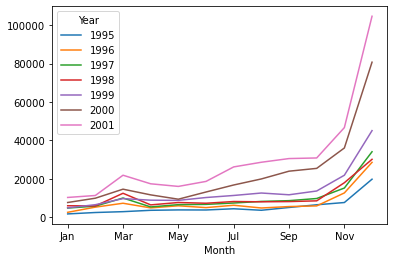

In [10]:
#Lineplot of monthwise sales across years
monthly_sales_data.plot()

<AxesSubplot:>

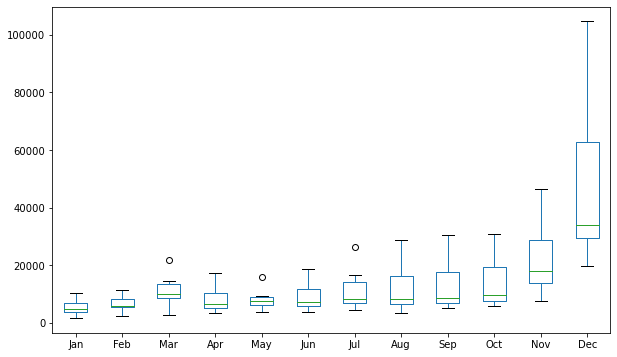

In [11]:
#Boxplot of month-wise sales across years
monthly_sales_data.T.boxplot(grid=False, figsize=(10,6))

# There is a clear seasonality in the data with peak sales noticed in nov/dec and lowest sales in the start of the year

In [12]:
#Create yearly sales data to look at yearly trend
yearly_sales_data = pd.pivot_table(df, values = "Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1995,1664.81,2397.53,2840.71,3547.29,3752.96,3714.74,4349.61,3566.34,5021.82,6423.48,7600.60,19756.21
1996,2499.81,5198.24,7225.14,4806.03,5900.88,4951.34,6179.12,4752.15,5496.43,5835.10,12600.08,28541.72
1997,4717.02,5702.63,9957.58,5304.78,6492.43,6630.80,7349.62,8176.62,8573.17,9690.50,15151.84,34061.01
1998,5921.10,5814.58,12421.25,6369.77,7609.12,7224.75,8121.22,7979.25,8093.06,8476.70,17914.66,30114.41
1999,4826.64,6470.23,9638.77,8821.17,8722.37,10209.48,11276.55,12552.22,11637.39,13606.89,21822.11,45060.69
2000,7615.03,9849.69,14558.40,11587.33,9332.56,13082.09,16732.78,19888.61,23933.38,25391.35,36024.80,80721.71
2001,10243.24,11266.88,21826.84,17357.33,15997.79,18601.53,26155.15,28586.52,30505.41,30821.33,46634.38,104660.67


<AxesSubplot:xlabel='Year'>

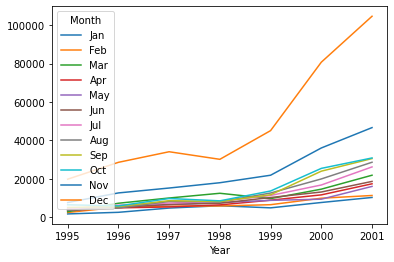

In [13]:
#Lineplot of yearly sales
yearly_sales_data.plot()

<AxesSubplot:>

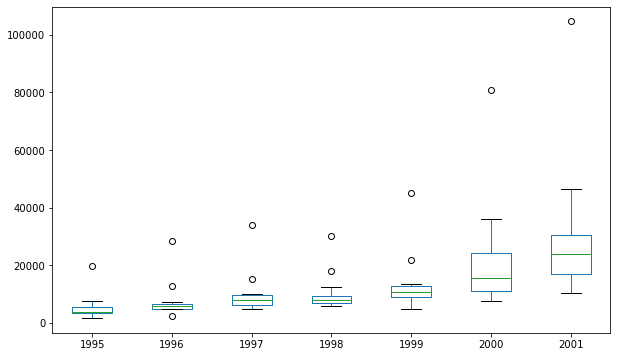

In [14]:
#Boxplot to visualise yearly trend
yearly_sales_data.T.boxplot(grid=False, figsize=(10,6))

#### Inferences

1. The Souvenir Sales have been increasing without fail every year.
2. November and December are the peak months for Souvenir sales and the variance and the mean value in November and December
are also much higher than any of the other months.
3. We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing trend in the end of the year and drops down towards the beginning of the year. We can see a seasonal effect with a cycle of 12 months.

In [15]:
df.index=dates
df=df[['Sales']]
df.head()

,Sales
1995-01-01,1664.81
1995-02-01,2397.53
1995-03-01,2840.71
1995-04-01,3547.29
1995-05-01,3752.96


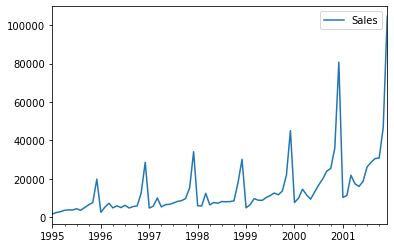

In [16]:
df.plot()
plt.show()

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations

In [17]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

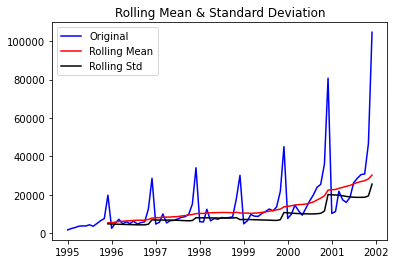

In [18]:
test_stationarity(df)

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

- constant mean
- constant variance
- an autocovariance that does not depend on time.

There are 2 major reasons behind non-stationaruty of a Souernir Sales:
- Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
-  Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.


In [19]:
def difference(dataset, interval=1):
    index = list(dataset.index)
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset['Sales'][i] - dataset['Sales'][i - interval]
        diff.append(value)
    return (diff)

Now that we have AR term lets calculate the differencing term 

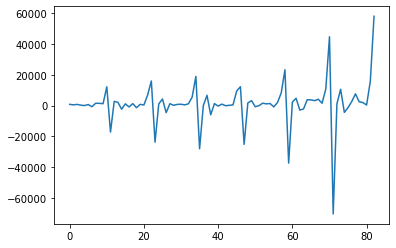

In [20]:
diff = difference(df)
plt.plot(diff)
plt.show()

This is not working well as there is an increasing positive trend
### So we have to apply transformation which penalize higher values more than smaller values. 

These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

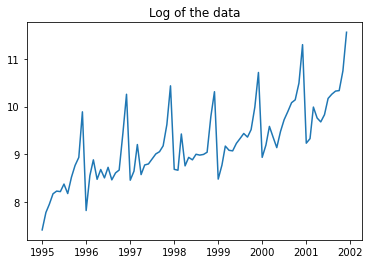

In [21]:
ts_log = np.log(df)
plt.title('Log of the data')
plt.plot(ts_log)
plt.show()

Text(0, 0.5, 'Differenced Log (Souvenir Sales)')

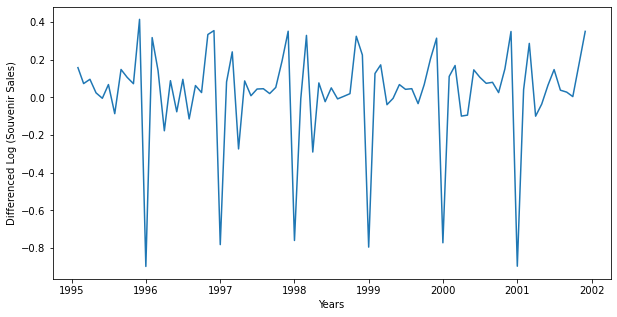

In [22]:
#Difference of log
plt.figure(figsize=(10, 5))
plt.plot(np.log10(df).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Souvenir Sales)')

In [23]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

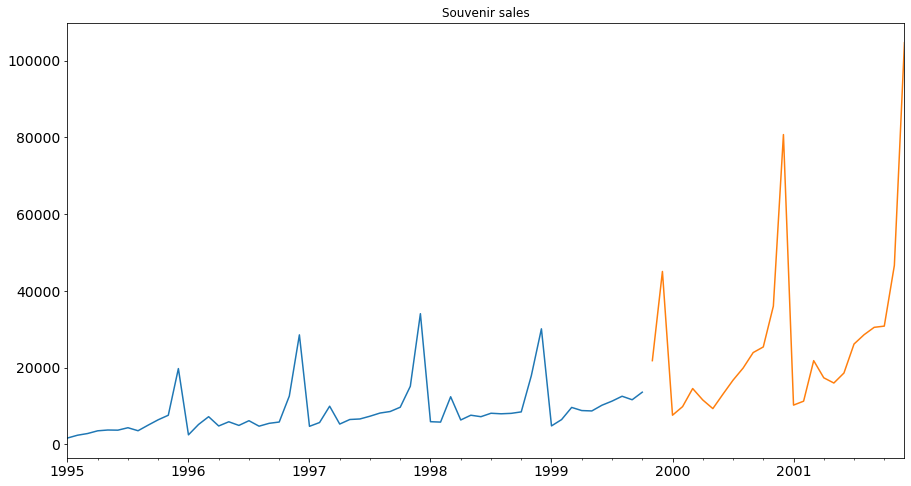

In [24]:
train.Sales.plot(figsize=(15,8), title= 'Souvenir sales', fontsize=14)
test.Sales.plot(figsize=(15,8), title= 'Souvenir sales', fontsize=14)
plt.show()

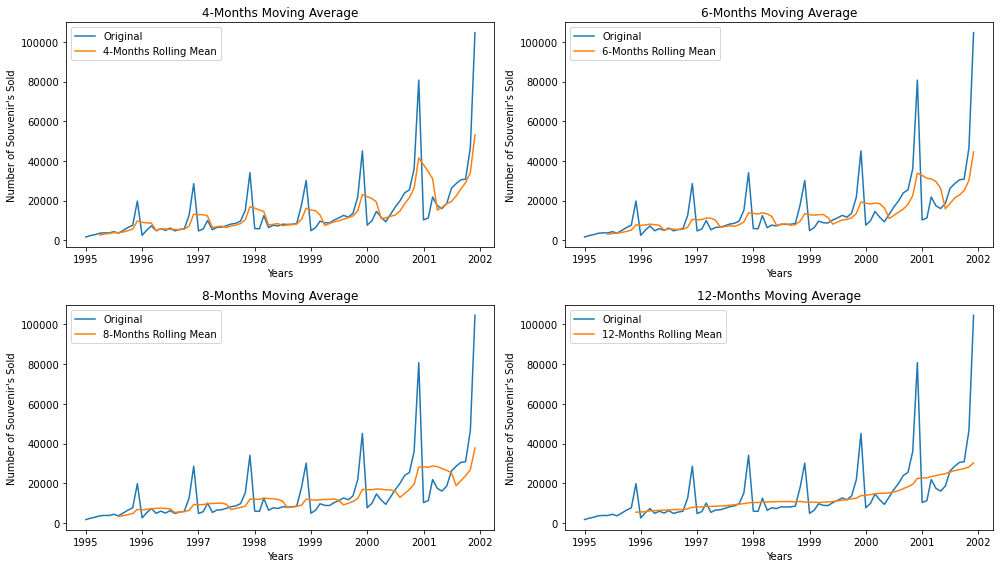

In [25]:
#Creating the subplot placeholders
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

#4 month MA
axes[0][0].plot(df.index, df, label='Original')
axes[0][0].plot(df.index, df.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Souvenir's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

#6 month MA
axes[0][1].plot(df.index, df, label='Original')
axes[0][1].plot(df.index, df.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Souvenir's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

#8 month MA
axes[1][0].plot(df.index, df, label='Original')
axes[1][0].plot(df.index, df.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Souvenir's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

#12 month MA
axes[1][1].plot(df.index, df, label='Original')
axes[1][1].plot(df.index, df.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Souvenir's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()


In [26]:
#Multiplicative decomposition of the series
decomposition = sm.tsa.seasonal_decompose(df, model='multiplicative')

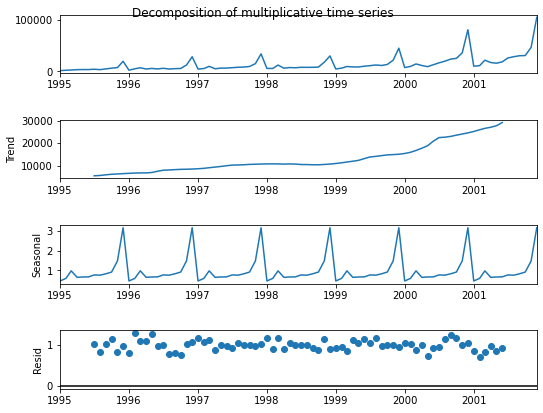

In [27]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

#### The series now has a constant mean as well as constant variance

In [31]:
#Log of the time series
sales_ts_log = np.log10(df)
sales_ts_log.dropna(inplace=True)

#Diff of the log
sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)

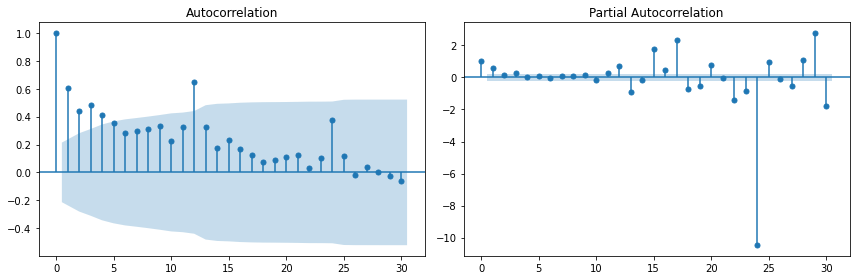

In [32]:
import statsmodels.tsa.api as smt
##ACF and PACF plots of the log series
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log, lags=30, ax=axes[1])
plt.tight_layout()

# The ACF plot with significant consecutive lags shows there is a trend in the series - that is every observation is correlated with many of its past observations

#### The PACF plot with significant lags at 5 and 6 are an indication of seasonality

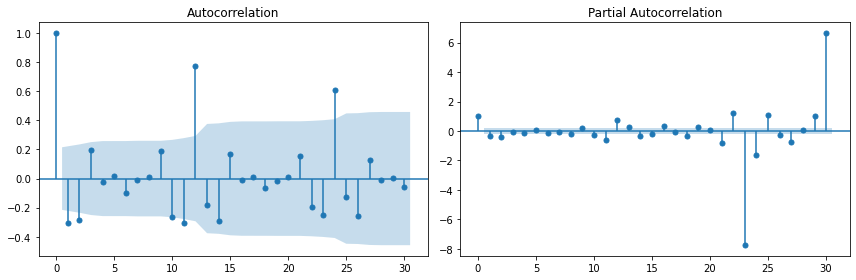

In [33]:
#ACF and PACF plots of diff of log series
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

# Regression on Time

In [34]:
time=[i+1 for i in range (len(df))]

In [35]:
df1=df.copy()
df1['time'] = time
df1.head()

,Sales,time
1995-01-01,1664.81,1
1995-02-01,2397.53,2
1995-03-01,2840.71,3
1995-04-01,3547.29,4
1995-05-01,3752.96,5


In [36]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [37]:
x_train = train.drop('Sales', axis=1)
x_test = test.drop('Sales', axis=1)
y_train = train[['Sales']]
y_test = test[['Sales']]

In [38]:
model = LinearRegression()

In [40]:
model.fit(x_train, y_train)

LinearRegression()

In [41]:
predictions = model.predict(x_test)

In [42]:
y_test['RegOnTime'] = predictions

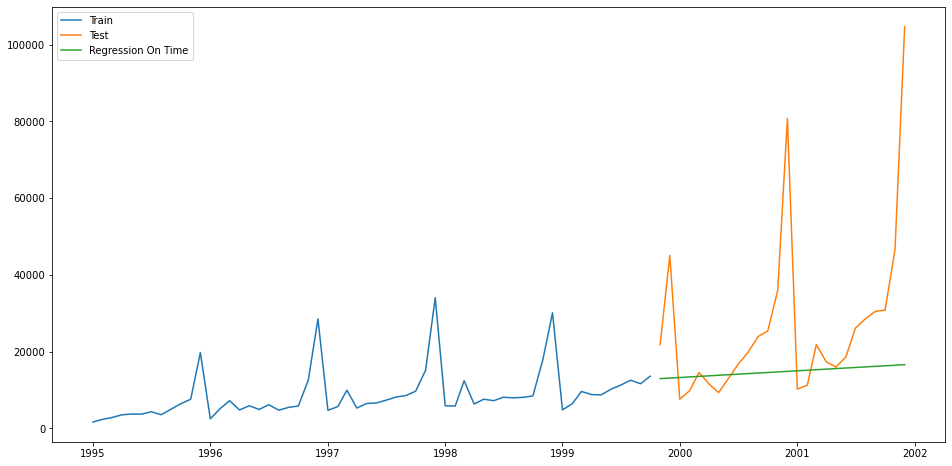

In [43]:
plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [44]:
rmse = np.sqrt(mean_squared_error(test.Sales, y_test.RegOnTime))
rmse = round(rmse, 3)
rmse

24527.31

In [45]:
abs_error = np.abs(y_test['Sales']-y_test['RegOnTime'])
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),3)
mape

0.398

In [46]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'rmse': [rmse]})
resultsDf

resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'MAPE': [mape], 'rmse': [rmse]})
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.31,0.398


# Regression on time seasonal

In [47]:
time = [i+1 for i in range(len(df))]
df1 = df.copy()
df1['time'] = time

In [48]:
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [49]:
df1['monthSeasonality'] = monthSeasonality*7
df1.head(12)

,Sales,time,monthSeasonality
1995-01-01,1664.81,1,m1
1995-02-01,2397.53,2,m2
1995-03-01,2840.71,3,m3
1995-04-01,3547.29,4,m4
1995-05-01,3752.96,5,m5
1995-06-01,3714.74,6,m6
1995-07-01,4349.61,7,m7
1995-08-01,3566.34,8,m8
1995-09-01,5021.82,9,m9
1995-10-01,6423.48,10,m10


In [50]:
df1Complete = pd.get_dummies(df1, drop_first=True)
df1Complete.head(4).T

,1995-01-01,1995-02-01,1995-03-01,1995-04-01
Sales,1664.81,2397.53,2840.71,3547.29
time,1.00,2.00,3.00,4.00
monthSeasonality_m10,0.00,0.00,0.00,0.00
monthSeasonality_m11,0.00,0.00,0.00,0.00
monthSeasonality_m12,0.00,0.00,0.00,0.00
monthSeasonality_m2,0.00,1.00,0.00,0.00
monthSeasonality_m3,0.00,0.00,1.00,0.00
monthSeasonality_m4,0.00,0.00,0.00,1.00
monthSeasonality_m5,0.00,0.00,0.00,0.00
monthSeasonality_m6,0.00,0.00,0.00,0.00


In [52]:
#Creating train and test set 
train=df1Complete[0:int(len(df1Complete)*0.7)] 
test=df1Complete[int(len(df1Complete)*0.7):]

In [54]:
x_train = train.drop('Sales', axis=1)
x_test = test.drop('Sales', axis=1)
y_train = train[['Sales']]
y_test = test[['Sales']]

In [55]:
model = LinearRegression()

In [56]:
model.fit(x_train, y_train)

LinearRegression()

In [57]:
predictions = model.predict(x_test)

In [58]:
y_test['RegOnTimeSeasonal'] = predictions

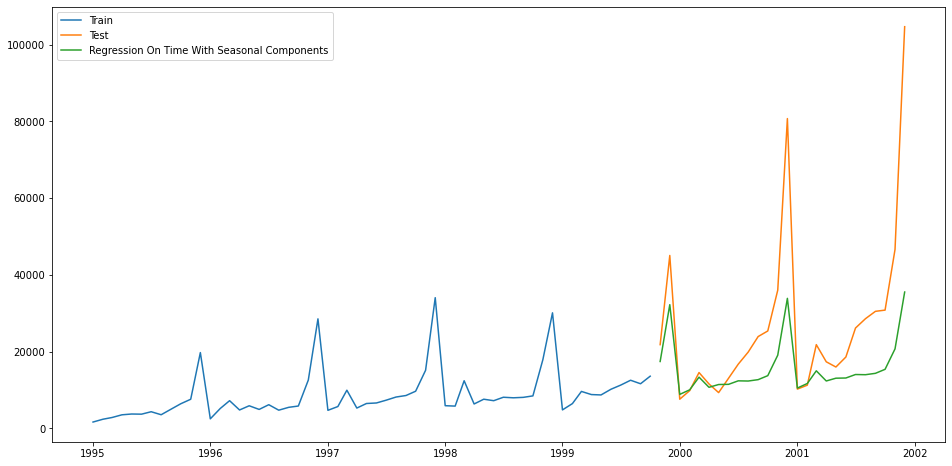

In [59]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')

In [60]:
rmse = np.sqrt(mean_squared_error(test.Sales, y_test.RegOnTimeSeasonal))
rmse = round(rmse, 3)
rmse

19045.756

In [61]:
abs_error = np.abs(y_test['Sales']-y_test['RegOnTimeSeasonal'])
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.3136

In [62]:
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136


# Model naive

In [63]:
dd= np.asarray(train.Sales)

In [64]:
dd

array([ 1664.81,  2397.53,  2840.71,  3547.29,  3752.96,  3714.74,
        4349.61,  3566.34,  5021.82,  6423.48,  7600.6 , 19756.21,
        2499.81,  5198.24,  7225.14,  4806.03,  5900.88,  4951.34,
        6179.12,  4752.15,  5496.43,  5835.1 , 12600.08, 28541.72,
        4717.02,  5702.63,  9957.58,  5304.78,  6492.43,  6630.8 ,
        7349.62,  8176.62,  8573.17,  9690.5 , 15151.84, 34061.01,
        5921.1 ,  5814.58, 12421.25,  6369.77,  7609.12,  7224.75,
        8121.22,  7979.25,  8093.06,  8476.7 , 17914.66, 30114.41,
        4826.64,  6470.23,  9638.77,  8821.17,  8722.37, 10209.48,
       11276.55, 12552.22, 11637.39, 13606.89])

In [65]:
y_hat = test.copy()

In [66]:
#y_hat['naive'] = dd[len(dd)-1]

for i in range(len(y_hat)):
    if i == 0:
        y_hat['naive'] = np.nan
    else:
        y_hat['naive'][i] = y_hat.Sales[i-1]


Text(0.5, 1.0, 'Naive Forecast')

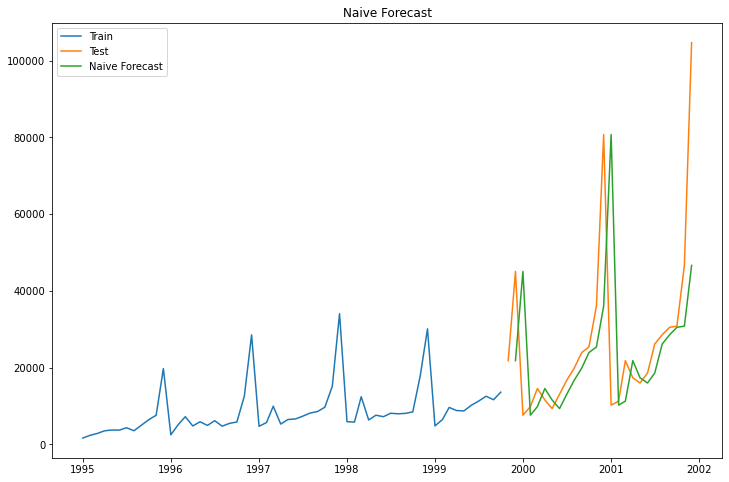

In [67]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index,test['Sales'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [68]:
#RMSE Calculation
rmse = np.sqrt(mean_squared_error(test.Sales[1:len(test.Sales)], y_hat.naive[1:len(test.Sales)]))
rmse = round(rmse, 3)
rmse

22752.789

In [69]:
abs_error = np.abs(y_test['Sales']-y_hat.naive)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.6999

In [70]:
tempResultsDf = pd.DataFrame({'Method':['Naive forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136
0,Naive forecast,22752.789,0.6999


# Simple average Forecast

In [71]:
y_hat_avg = test.copy()

In [72]:
y_hat_avg['avg_forecast'] = train['Sales'].mean()

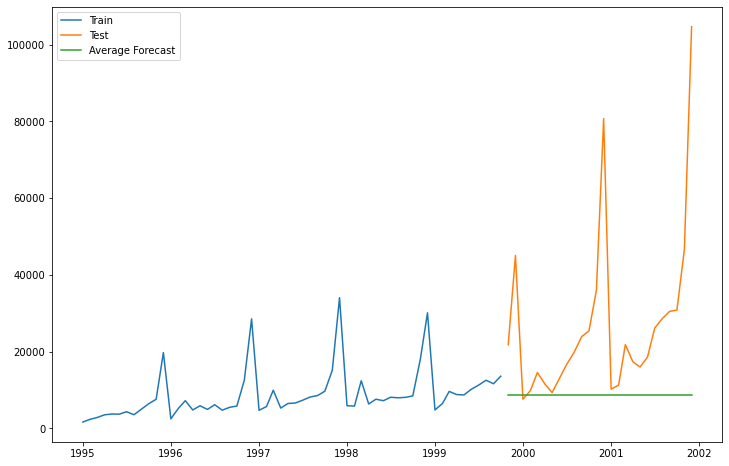

In [73]:
plt.figure(figsize=(12,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [78]:
rmse = np.sqrt(mean_squared_error(test.Sales, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
rmse

28364.958

In [79]:
abs_error = np.abs(y_test['Sales']-y_hat_avg.avg_forecast)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.5273

In [80]:
tempResultsDf = pd.DataFrame({'Method':['Simple average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136
0,Naive forecast,22752.789,0.6999
0,Simple average forecast,28364.958,0.5273
0,Simple average forecast,28364.958,0.5273


# Moving average

In [81]:
df1 = df.copy()

In [82]:
df1['moving_avg_forecast'] = df['Sales'].rolling(12).mean()

In [83]:
df1.head(3)

,Sales,moving_avg_forecast
1995-01-01,1664.81,NaN
1995-02-01,2397.53,NaN
1995-03-01,2840.71,NaN


In [84]:
df1.tail(3)

,Sales,moving_avg_forecast
2001-10-01,30821.33,27342.377500
2001-11-01,46634.38,28226.509167
2001-12-01,104660.67,30221.422500


In [86]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [87]:
y_hat_avg = test.copy()

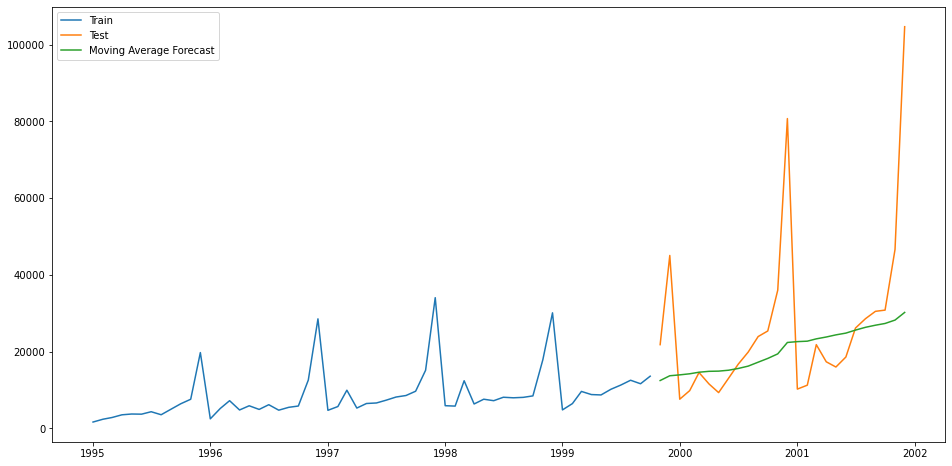

In [88]:
plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [89]:
y_hat_avg.moving_avg_forecast

1999-11-01    12474.852500
1999-12-01    13720.375833
2000-01-01    13952.741667
2000-02-01    14234.363333
2000-03-01    14644.332500
2000-04-01    14874.845833
2000-05-01    14925.695000
2000-06-01    15165.079167
2000-07-01    15619.765000
2000-08-01    16231.130833
2000-09-01    17255.796667
2000-10-01    18237.835000
2000-11-01    19421.392500
2000-12-01    22393.144167
2001-01-01    22612.161667
2001-02-01    22730.260833
2001-03-01    23335.964167
2001-04-01    23816.797500
2001-05-01    24372.233333
2001-06-01    24832.186667
2001-07-01    25617.384167
2001-08-01    26342.210000
2001-09-01    26889.879167
2001-10-01    27342.377500
2001-11-01    28226.509167
2001-12-01    30221.422500
Freq: MS, Name: moving_avg_forecast, dtype: float64

In [90]:
rmse = np.sqrt(mean_squared_error(test.Sales, y_hat_avg.moving_avg_forecast))
rmse = round(rmse, 3)
rmse

20858.125

In [91]:
abs_error = np.abs(y_test['Sales']-y_hat_avg.moving_avg_forecast)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.4002

In [92]:
tempResultsDf = pd.DataFrame({'Method':['Moving average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136
0,Naive forecast,22752.789,0.6999
0,Simple average forecast,28364.958,0.5273
0,Simple average forecast,28364.958,0.5273
0,Moving average forecast,20858.125,0.4002


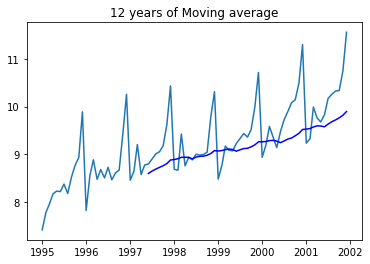

In [93]:
moving_avg = ts_log.rolling(30).mean()
plt.plot(ts_log)
plt.title('12 years of Moving average')
plt.plot(moving_avg, color='blue')
plt.show()

In [96]:
ts_log_moving_avg_diff = ts_log - moving_avg

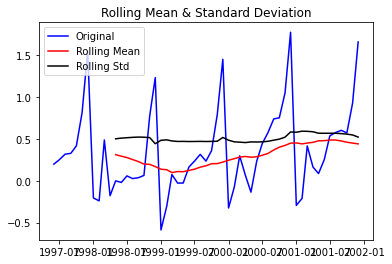

In [97]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

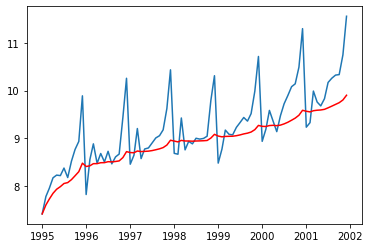

In [98]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
#parameter halflife is used to define the amount of exponential decay
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.show()

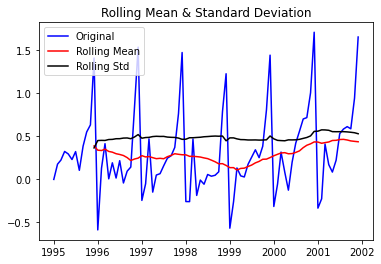

In [99]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

# Differencing

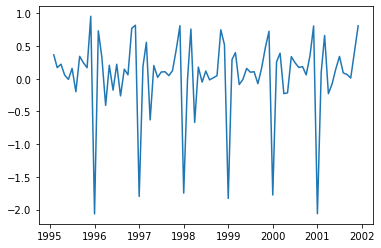

In [100]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

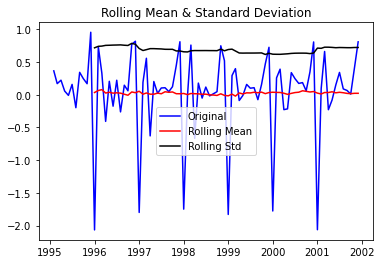

In [101]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Decomposition

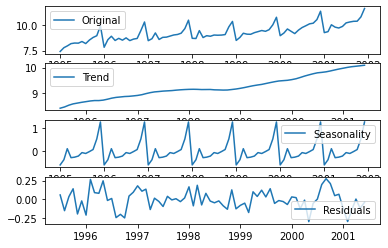

<Figure size 432x288 with 0 Axes>

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()
plt.tight_layout()

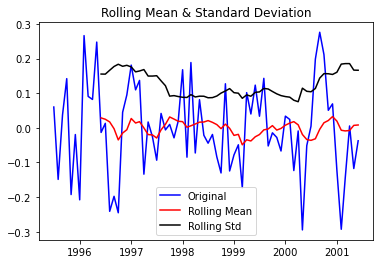

In [103]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

### Some of our key observations from this analysis:

1) Trend: 12-months moving average looks quite similar to a straight line hence we could have easily used linear regression to estimate the trend in this data.

2) Seasonality: Seasonal plot displays a fairly consistent month-on-month pattern. The monthly seasonal components are average values for a month after removal of trend. Trend is removed from the time series using the following formula:

Seasonality_t × Remainder_t = Y_t/Trend_t
 
3) Irregular Remainder (random): is the residual left in the series after removal of trend and seasonal components. Remainder is calculated using the following formula:

Remainder_t = Y_t / (Trend_t × Seasonality_t)

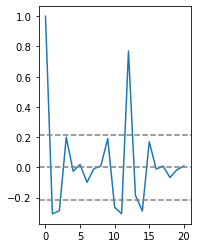

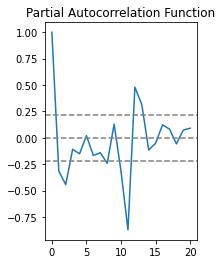

<Figure size 432x288 with 0 Axes>

In [104]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.show()
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

- p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
- q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.


# Simple exponentital smoothing

In [106]:
# create class
model = SimpleExpSmoothing(train['Sales'])

In [107]:
# fit model
model_fit = model.fit(smoothing_level=0.8,optimized=False)
model_fit.params

{'smoothing_level': 0.8,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 1664.81,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [108]:
y_hat_avg = test.copy()

In [109]:
y_hat_avg['SES'] = model_fit.forecast(len(test['Sales']))

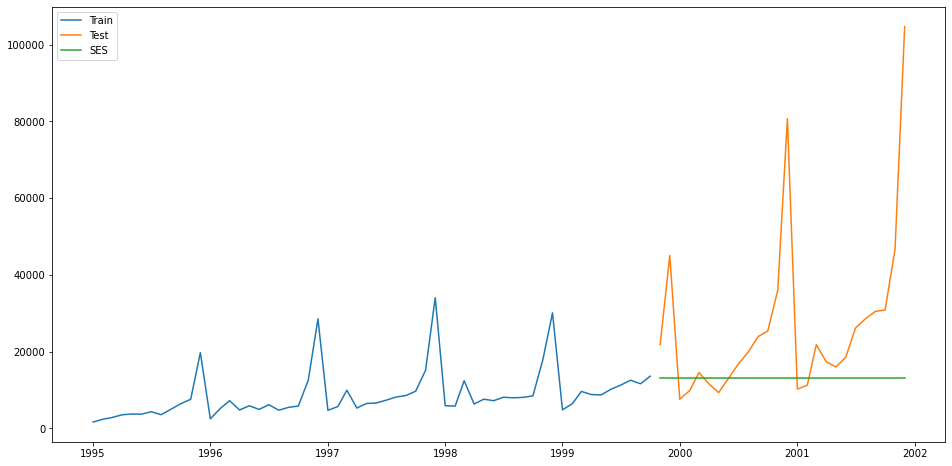

In [110]:
plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

In [111]:
rmse = np.sqrt(mean_squared_error(test.Sales, y_hat_avg.SES))
rmse = round(rmse, 3)
rmse

25694.036

In [112]:
abs_error = np.abs(y_test['Sales']-y_hat_avg.SES)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.4269

In [113]:
tempResultsDf = pd.DataFrame({'Method':['SES forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136
0,Naive forecast,22752.789,0.6999
0,Simple average forecast,28364.958,0.5273
0,Simple average forecast,28364.958,0.5273
0,Moving average forecast,20858.125,0.4002
0,SES forecast,25694.036,0.4269


In [114]:
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in alpha:
    model_fit = model.fit(smoothing_level=i,optimized=False)
    ap_ES = test.copy()
    ap_ES['SES'] = model_fit.forecast(len(test['Sales']))
    rmse = np.sqrt(mean_squared_error(test.Sales, ap_ES.SES))
    rmse = round(rmse, 3)
    print('The RMSE Value for i',i,'is : ',rmse)

The RMSE Value for i 0.1 is :  26953.005
The RMSE Value for i 0.2 is :  26644.667
The RMSE Value for i 0.3 is :  26425.137
The RMSE Value for i 0.4 is :  26219.327
The RMSE Value for i 0.5 is :  26044.535
The RMSE Value for i 0.6 is :  25905.412
The RMSE Value for i 0.7 is :  25792.782
The RMSE Value for i 0.8 is :  25694.036
The RMSE Value for i 0.9 is :  25598.828
The RMSE Value for i 1.0 is :  25500.015


# Holtz method

In [115]:
fit1 = ExponentialSmoothing(np.asarray(train['Sales']) ,trend='add', seasonal=None).fit()
fit1.params

{'smoothing_level': 0.09928571428571428,
 'smoothing_trend': 0.09928571428571428,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1664.81,
 'initial_trend': 732.7200000000003,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [116]:
y_hat_avg['Holt'] = fit1.forecast(len(test))

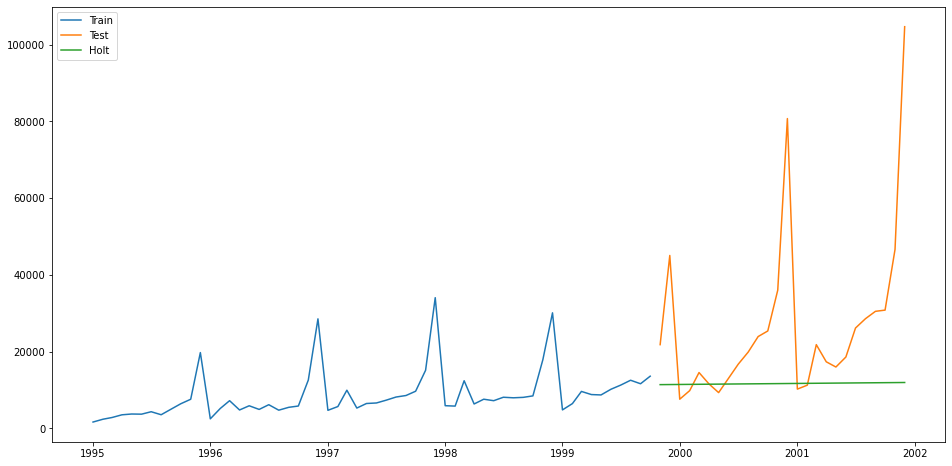

In [117]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt'], label='Holt')
plt.legend(loc='best')

In [118]:
rmse = np.sqrt(mean_squared_error(test.Sales, y_hat_avg.Holt))
rmse = round(rmse, 3)
rmse

26491.787

In [119]:
abs_error = np.abs(y_test['Sales']-y_hat_avg.Holt)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.4365

In [120]:
tempResultsDf = pd.DataFrame({'Method':['Holt'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136
0,Naive forecast,22752.789,0.6999
0,Simple average forecast,28364.958,0.5273
0,Simple average forecast,28364.958,0.5273
0,Moving average forecast,20858.125,0.4002
0,SES forecast,25694.036,0.4269
0,Holt,26491.787,0.4365


# Holts'z winter - additive

In [121]:
y_hat_avg = test.copy()

In [122]:
fit1 = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.289163935257513,
 'smoothing_trend': 0.0006308896353951443,
 'smoothing_seasonal': 0.7095316702977005,
 'damping_trend': nan,
 'initial_level': 3922.9046120117014,
 'initial_trend': 154.38926807111088,
 'initial_seasons': array([-2260.54067163, -1526.50265787, -1083.76355872,  -380.31677237,
         -174.04170539,  -212.74012999,   422.37611826,  -361.29491418,
         1094.08658674,  2496.95906556,  3677.41631384, 15830.93906878]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [123]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

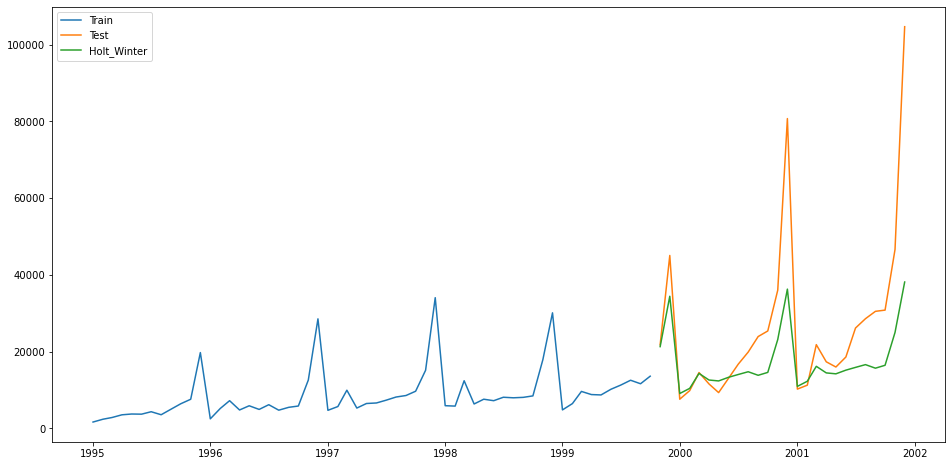

In [124]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [125]:
rmse = np.sqrt(mean_squared_error(test.Sales, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

17695.031

In [126]:
abs_error = np.abs(y_test['Sales']-y_hat_avg.Holt_Winter)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2644

In [128]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Additive'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136
0,Naive forecast,22752.789,0.6999
0,Simple average forecast,28364.958,0.5273
0,Simple average forecast,28364.958,0.5273
0,Moving average forecast,20858.125,0.4002
0,SES forecast,25694.036,0.4269
0,Holt,26491.787,0.4365
0,Holt Winter forecast - Additive,17695.031,0.2644
0,Holt Winter forecast - Additive,17695.031,0.2644


In [129]:
resultsDf.index = [i for i in range(len(resultsDf))]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
1,RegressionOnTimeSeasonal,19045.756,0.3136
2,Naive forecast,22752.789,0.6999
3,Simple average forecast,28364.958,0.5273
4,Simple average forecast,28364.958,0.5273
5,Moving average forecast,20858.125,0.4002
6,SES forecast,25694.036,0.4269
7,Holt,26491.787,0.4365
8,Holt Winter forecast - Additive,17695.031,0.2644
9,Holt Winter forecast - Additive,17695.031,0.2644


# Holt'z winter - multiplicative

In [130]:
fit1 = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.6060714285714286,
 'smoothing_trend': 0.05509740259740259,
 'smoothing_seasonal': 0.3939285714285714,
 'damping_trend': nan,
 'initial_level': 3925.876,
 'initial_trend': 203.81902777777782,
 'initial_seasons': array([0.42406077, 0.61069937, 0.72358628, 0.90356649, 0.9559548 ,
        0.94621939, 1.10793362, 0.90841891, 1.2791591 , 1.63619024,
        1.93602651, 5.03230617]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [131]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

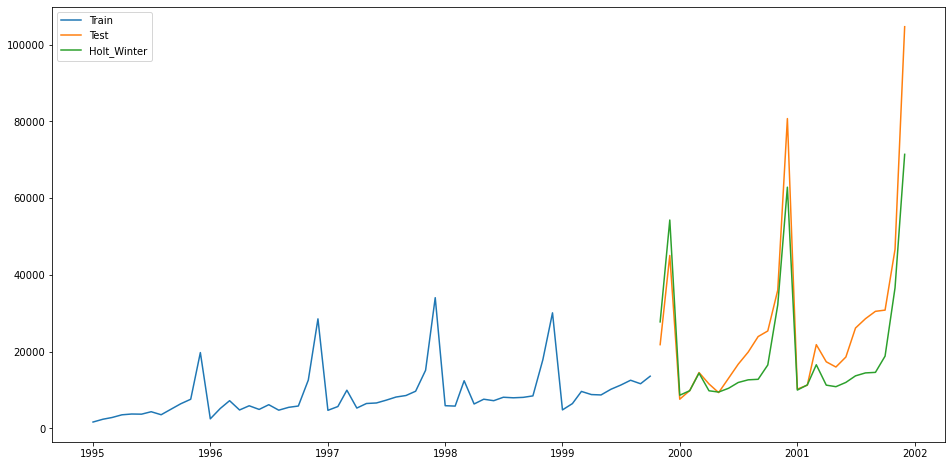

In [132]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [133]:
rmse = np.sqrt(mean_squared_error(test.Sales, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

10442.601

In [134]:
abs_error = np.abs(y_test['Sales']-y_hat_avg.Holt_Winter)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2498

In [135]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Mult'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
1,RegressionOnTimeSeasonal,19045.756,0.3136
2,Naive forecast,22752.789,0.6999
3,Simple average forecast,28364.958,0.5273
4,Simple average forecast,28364.958,0.5273
5,Moving average forecast,20858.125,0.4002
6,SES forecast,25694.036,0.4269
7,Holt,26491.787,0.4365
8,Holt Winter forecast - Additive,17695.031,0.2644
9,Holt Winter forecast - Additive,17695.031,0.2644


# AR model

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

   -  Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
   -  Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
   - Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.


An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

- Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
- Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.


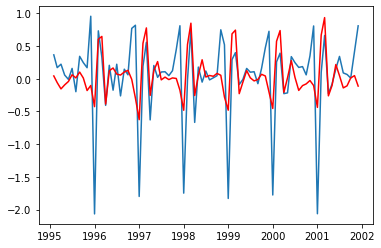

In [136]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2, 1, 0), freq=ts_log.index.inferred_freq)  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()

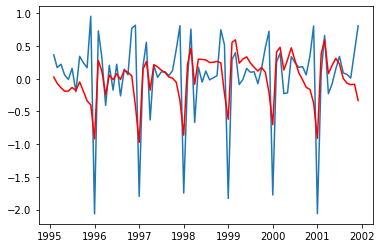

In [137]:
model = ARIMA(ts_log, order=(0, 1, 2), freq=ts_log.index.inferred_freq)  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

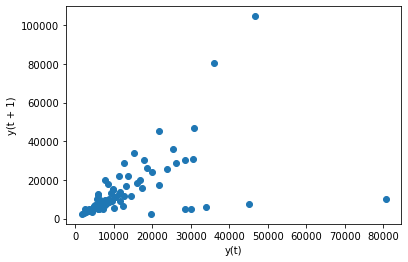

In [138]:
pd.plotting.lag_plot(df['Sales'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

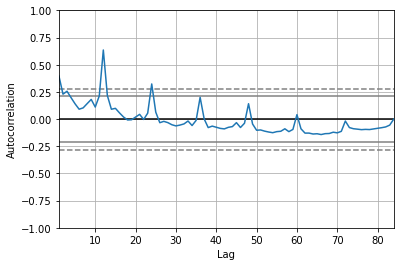

In [139]:
#ACF
pd.plotting.autocorrelation_plot(df['Sales'])

In [140]:
df1['Sales'].corr(df1['Sales'].shift(12))

0.9698176095515455

In [141]:
df.head()

,Sales
1995-01-01,1664.81
1995-02-01,2397.53
1995-03-01,2840.71
1995-04-01,3547.29
1995-05-01,3752.96


In [142]:
df1['stationary']=df1['Sales'].diff()

<AxesSubplot:>

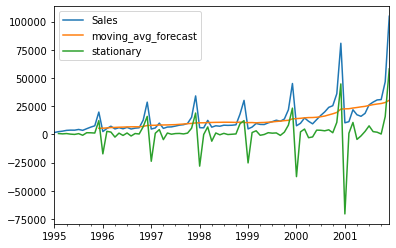

In [143]:
df1.plot()

In [144]:
from statsmodels.tsa.ar_model import AR
 
#create train/test datasets
X = df1['stationary'].dropna()

In [145]:
df1.head()

,Sales,moving_avg_forecast,stationary
1995-01-01,1664.81,NaN,NaN
1995-02-01,2397.53,NaN,732.72
1995-03-01,2840.71,NaN,443.18
1995-04-01,3547.29,NaN,706.58
1995-05-01,3752.96,NaN,205.67


In [146]:
df3=df1.drop(['Sales','moving_avg_forecast'],axis=1)

In [147]:
X = df3['stationary'].dropna()
X.head()

1995-02-01    732.72
1995-03-01    443.18
1995-04-01    706.58
1995-05-01    205.67
1995-06-01    -38.22
Freq: MS, Name: stationary, dtype: float64

In [148]:
train=X[0:int(len(df1)*0.7)] 
test=X[int(len(df1)*0.7):]

In [149]:
#train the autoregression model
model = AR(train)
model_fitted = model.fit()

In [150]:

print('The lag value chose is: %s' % model_fitted.k_ar)
 
    

 
print('The coefficients of the model are:\n %s' % model_fitted.params)

The lag value chose is: 10
The coefficients of the model are:
 const             1018.604167
L1.stationary       -0.668252
L2.stationary       -0.822875
L3.stationary       -0.571746
L4.stationary       -0.658784
L5.stationary       -0.515978
L6.stationary       -0.610222
L7.stationary       -0.460402
L8.stationary       -0.515324
L9.stationary       -0.272939
L10.stationary      -0.411116
dtype: float64


In [151]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train), 
    end=len(train) + len(test)-1, 
    dynamic=False)

<AxesSubplot:>

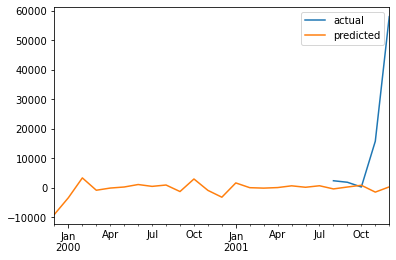

In [152]:
# create a comparison dataframe
compare_df = pd.concat(
    [df3['stationary'].tail(),
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})
 
#plot the two values
compare_df.plot()

In [153]:
from sklearn.metrics import r2_score
 
r2 = r2_score(df3['stationary'].tail(25), predictions)
r2

-0.08564298676930315

In [154]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions.values[i], test.values[i]))

predicted=-8940.983287, expected=23238.580000
predicted=-3312.655694, expected=-37445.660000
predicted=3394.173446, expected=2234.660000
predicted=-784.185976, expected=4708.710000
predicted=-45.691807, expected=-2971.070000
predicted=314.195008, expected=-2254.770000
predicted=1151.816963, expected=3749.530000
predicted=524.721328, expected=3650.690000
predicted=984.754763, expected=3155.830000
predicted=-1227.332141, expected=4044.770000
predicted=3027.275520, expected=1457.970000
predicted=-828.554631, expected=10633.450000
predicted=-3141.884565, expected=44696.910000
predicted=1692.027103, expected=-70478.470000
predicted=82.931825, expected=1023.640000
predicted=-67.339225, expected=10559.960000
predicted=118.832595, expected=-4469.510000
predicted=713.466156, expected=-1359.540000
predicted=223.686534, expected=2603.740000
predicted=734.968828, expected=7553.620000
predicted=-337.015443, expected=2431.370000
predicted=308.942729, expected=1918.890000
predicted=899.376094, expect

In [155]:
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 23454.338


In [156]:
abs_error = np.abs(test-predictions)
actual = test
mape = np.round(np.mean(abs_error/actual),3)
mape

0.515

In [157]:
tempResultsDf = pd.DataFrame({'Method':['AR Model'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.31000,0.3980
1,RegressionOnTimeSeasonal,19045.75600,0.3136
2,Naive forecast,22752.78900,0.6999
3,Simple average forecast,28364.95800,0.5273
4,Simple average forecast,28364.95800,0.5273
5,Moving average forecast,20858.12500,0.4002
6,SES forecast,25694.03600,0.4269
7,Holt,26491.78700,0.4365
8,Holt Winter forecast - Additive,17695.03100,0.2644
9,Holt Winter forecast - Additive,17695.03100,0.2644


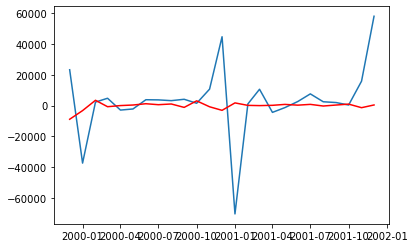

In [158]:
plt.plot(test)
plt.plot(predictions,color = 'red')

# Arima model

In [159]:
from statsmodels.tsa.arima_model import ARIMA

In [160]:
df.head()

,Sales
1995-01-01,1664.81
1995-02-01,2397.53
1995-03-01,2840.71
1995-04-01,3547.29
1995-05-01,3752.96


In [161]:
train=df[0:int(len(df1)*0.7)] 
test=df[int(len(df1)*0.7):]

In [162]:
# parameter - p,q,d
# p - periods taken for auto regressive model - how many month ? 1 month then 1 period
# q - moving average, get the errors.Perios in moving average
# d - order of integreation or integrated order - how many times difference is done
model_arima = ARIMA(train,order = (3,1,0)) # p -3 , d = 1, q =1
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1175.7577195958875


In [163]:
len(train),len(test)

(58, 26)

In [164]:
# forecast next 10 values
predictions = model_arima_fit.forecast(steps=26)[0]
predictions

array([13187.90211833, 13028.74500046, 13455.97225582, 13761.88464751,
       13824.37428408, 13998.43113633, 14241.63912615, 14427.39826341,
       14597.2554969 , 14793.45168276, 14990.37950317, 15176.70410136,
       15364.95857084, 15557.02427444, 15747.52161831, 15936.83383586,
       16127.01826376, 16317.49055624, 16507.55570231, 16697.59195786,
       16887.79610577, 17077.97647116, 17268.09510115, 17458.23615135,
       17648.39702963, 17838.54483185])

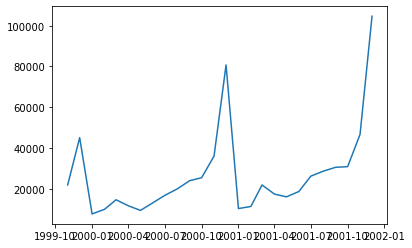

In [165]:

plt.plot(test)

In [166]:
df.head()

,Sales
1995-01-01,1664.81
1995-02-01,2397.53
1995-03-01,2840.71
1995-04-01,3547.29
1995-05-01,3752.96


In [167]:
p=d=q=range(0,5)

import itertools
## create a list with all possible combination
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [168]:
## Build the model by giving it in a loop with all the possible combination of p,d,q
# use try catch, as the model will not accept all the values

import warnings 
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima = ARIMA(train,order = param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    
    except:
        continue

(0, 0, 0) 1183.8991275791693
(0, 0, 1) 1182.519164719856
(0, 0, 2) 1184.1682396122608
(0, 0, 3) 1185.12767100942
(0, 0, 4) 1187.124880592291
(0, 1, 0) 1188.736188146059
(0, 1, 1) 1161.504922250048
(0, 1, 2) 1162.3353154342244
(0, 1, 3) 1162.5378591028345
(0, 1, 4) 1164.531316963838
(0, 2, 0) 1224.732080463408
(0, 2, 1) 1174.981718250829
(0, 2, 2) 1151.7784035640682
(0, 2, 3) nan
(0, 2, 4) 1152.7569734741292
(1, 0, 0) 1182.9957778083663
(1, 0, 1) 1183.668157241133
(1, 0, 2) 1190.1142709481985
(1, 0, 3) 1356.6033948624759
(1, 0, 4) 1304.4811329893942
(1, 1, 0) 1183.204334024038
(1, 1, 1) 1162.7003449537092
(1, 1, 2) 1162.6825761760833
(1, 1, 3) 1164.4159340477831
(1, 2, 0) 1207.4523401113188
(2, 0, 0) 1184.777830272394
(2, 0, 1) 1185.6004167800377
(2, 0, 2) 1216.7555658358856
(2, 0, 3) 1192.1352152959112
(2, 1, 0) 1174.8674213874694
(2, 1, 1) 1163.3202196427405
(2, 1, 3) 1158.6160320540237
(2, 2, 0) 1188.5509972848781
(2, 2, 1) 1162.6537729200745
(3, 0, 0) 1185.6202830767081
(3, 0, 1) 11

In [169]:
model_arima = ARIMA(train,order = (0,1,1)) # p -3 , d = 1, q =1
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1161.504922250048


In [170]:
#Metrics
#Mean squared error

mean_squared_error(test,predictions)

581166853.5569524

# Sarima Model

In [171]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

In [172]:
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [173]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [174]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [175]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [177]:
train_sales_ts_log = np.log10(train['Sales'])

In [178]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [179]:
for param in pdq:
    for param_seasonal in seasonal_pdq:      
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()
            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 model - AIC:-86.69293450650657


In [180]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3571      1.575     -0.862      0.389      -4.443       1.729
ar.L2         -0.4899      0.927     -0.529      0.597      -2.307       1.327
ma.L1         -0.2081      3.389     -0.061      0.951      -6.850       6.434
ma.L2         -0.7729      3.825     -0.202      0.840      -8.269       6.723
ar.S.L12      -0.3047      2.890     -0.105      0.916      -5.968       5.359
ar.S.L24       0.1289     13.982      0.009      0.993     -27.275      27.533
ma.S.L12      -0.2664      2.145     -0.124      0.901      -4.470       3.937
ma.S.L24      -0.0417     22.308     -0.002      0.999     -43.764      43.680
sigma2         0.0146      0.053      0.276      0.782      -0.089       0.118


In [181]:
from pmdarima.arima import auto_arima

##  p,d,q values for the ARIMA, and P,D,Q values for the Seasonal component.

stepwise_model = auto_arima(df, start_p=1, start_q=1,start_d=0,max_d=5,
                           max_p=5, max_q=5, m=12,
                           start_P=0,start_D=0,start_Q=0,max_P=5,max_Q=5, seasonal=True,
                           d=1, max_D=5, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,2,0)[12]             : AIC=1173.397, Time=0.16 sec
 ARIMA(0,1,0)(0,2,0)[12]             : AIC=1186.540, Time=0.08 sec
 ARIMA(1,1,0)(1,2,0)[12]             : AIC=1177.803, Time=0.13 sec
 ARIMA(0,1,1)(0,2,1)[12]             : AIC=1168.797, Time=0.17 sec
 ARIMA(0,1,1)(0,2,0)[12]             : AIC=1171.127, Time=0.25 sec
 ARIMA(0,1,1)(1,2,1)[12]             : AIC=1166.940, Time=0.96 sec
 ARIMA(0,1,1)(1,2,0)[12]             : AIC=1172.807, Time=0.24 sec
 ARIMA(0,1,1)(2,2,1)[12]             : AIC=1160.123, Time=2.30 sec
 ARIMA(0,1,1)(2,2,0)[12]             : AIC=1169.357, Time=0.52 sec
 ARIMA(0,1,1)(3,2,1)[12]             : AIC=1154.016, Time=3.58 sec
 ARIMA(0,1,1)(3,2,0)[12]             : AIC=1154.380, Time=2.10 sec
 ARIMA(0,1,1)(4,2,1)[12]             : AIC=inf, Time=3.92 sec
 ARIMA(0,1,1)(3,2,2)[12]             : AIC=1152.569, Time=4.87 sec
 ARIMA(0,1,1)(2,2,2)[12]             : AIC=inf, Time=3.70 sec
 ARIMA(0,1,1)(4,2,2)[12]     

In [182]:
stepwise_model.aic()

1151.2206317218604

In [183]:
#train the model
stepwise_model.fit(df)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(4, 2, 3, 12),
      suppress_warnings=True, with_intercept=False)

In [184]:
# predict the model
future_forecast = stepwise_model.predict(n_periods=26)
print(future_forecast)

[ 17698.41119628  15326.71413474  30428.3130691   26803.7053789
  26198.3161233   28259.55956484  37803.55299015  40291.81118094
  39516.66739574  41009.36112007  57101.4663456  122763.40930097
  26249.94237548  23753.77690832  40216.97951883  37366.86241223
  36734.47763833  38284.85286867  48779.83116074  50130.5857085
  48152.13249938  49206.90083396  69334.78294606 134246.08231623
  35376.75742074  34043.70731353]


In [185]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

In [186]:
future_forecast.head()

,Prediction
1999-11-01,17698.411196
1999-12-01,15326.714135
2000-01-01,30428.313069
2000-02-01,26803.705379
2000-03-01,26198.316123


In [187]:
test.head()

,Sales
1999-11-01,21822.11
1999-12-01,45060.69
2000-01-01,7615.03
2000-02-01,9849.69
2000-03-01,14558.40


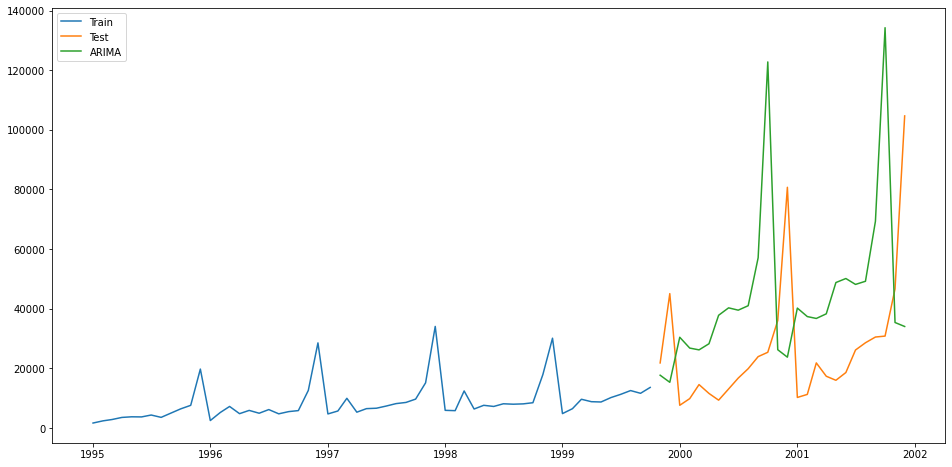

In [188]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(future_forecast['Prediction'], label='ARIMA')
plt.legend(loc='best')

In [189]:
future_forecast2 = future_forecast
future_forecast2.head()

,Prediction
1999-11-01,17698.411196
1999-12-01,15326.714135
2000-01-01,30428.313069
2000-02-01,26803.705379
2000-03-01,26198.316123


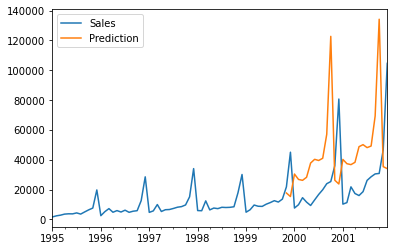

In [190]:
pd.concat([df,future_forecast2],axis=1).plot()
plt.show()

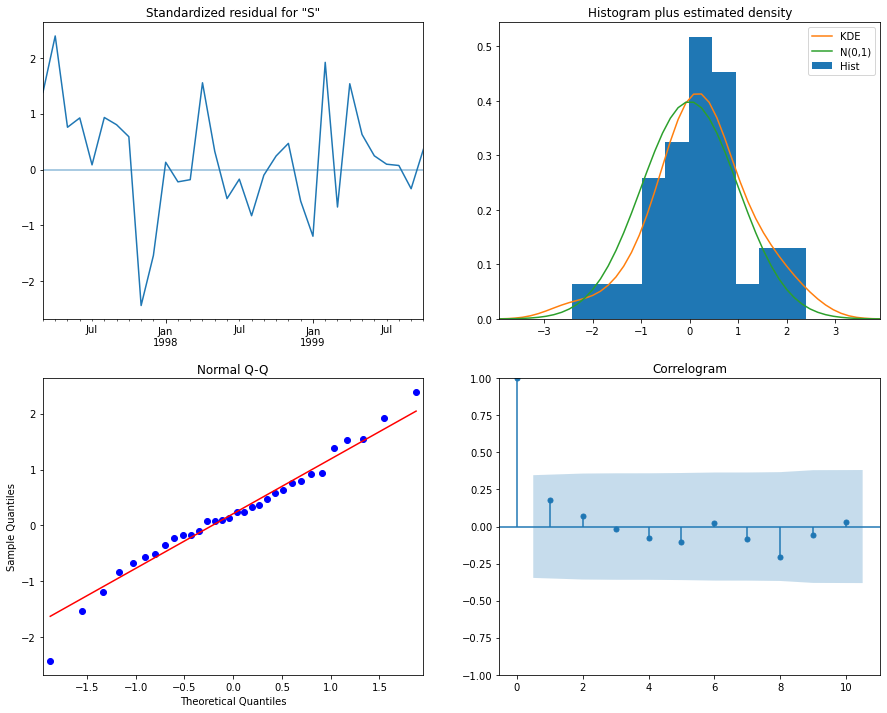

In [191]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If it is not that it signifies that the model can be further improved and we repeat the process with the residuals.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

1. The KDE plot of the residuals on the top right is almost similar with the normal distribution.
2. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
3. The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations coupled with the fact that there are no spikes outside the insignificant zone for both ACF and PACF plots lead us to conclude that that residuals are random with no information or juice in them and our model produces a satisfactory fit that could help us understand our time series data and forecast future values. It sems that our ARIMA model is working fine.